In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paramaggarwal/fashion-product-images-small
!unzip fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/5813.jpg  
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/image

In [3]:
import pandas as pd
df = pd.read_csv('/content/myntradataset/styles.csv', on_bad_lines='skip')

In [4]:
df.shape

(44424, 10)

The dataset contains 44424 rows and 10 classes.

In [5]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [6]:
df['masterCategory'].unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

In [7]:
category_counts = df['masterCategory'].value_counts()
print(category_counts)

masterCategory
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64


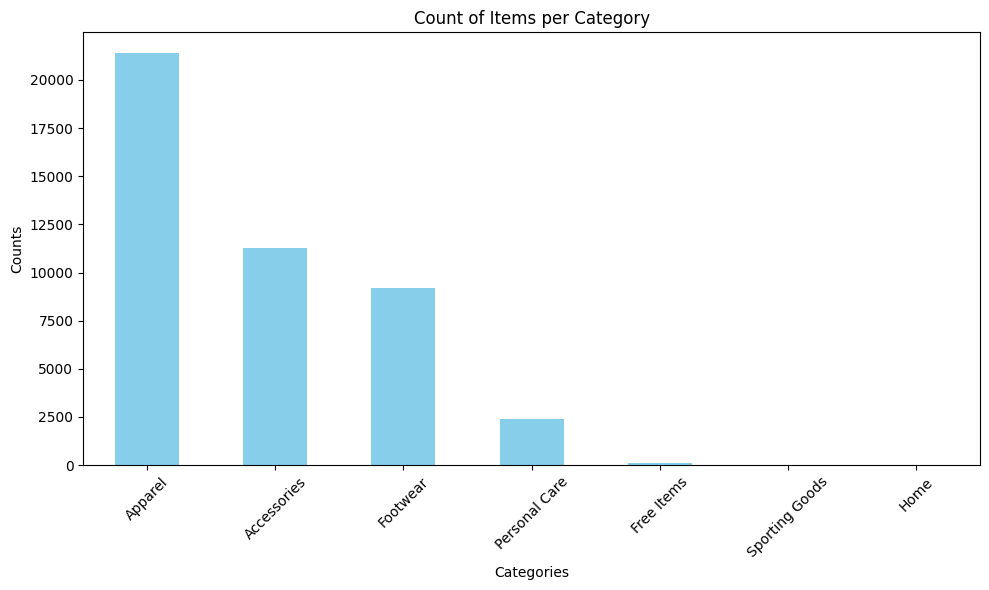

In [8]:
import matplotlib.pyplot as plt
category_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Count of Items per Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

From the graph it can be seen that the three master categories Free items, Sporting Goods and Home datas are negligible.


In [9]:
!ls /content/images | wc -l

44441


The number of images are different from the number of Ids present.

In [10]:
import os,numpy as np
image_folder = 'myntradataset/images'
image_files = os.listdir(image_folder)
dataset_ids = df['id'].astype(str) + '.jpg'
dataset_ids_set = set(dataset_ids)
image_files_set = set(image_files)
#Missing images are calculated.
missing_images = dataset_ids_set - image_files_set
#Extra images with no corresponding ids are calculated.
extra_images = image_files_set - dataset_ids_set
print(missing_images)
print(extra_images)

print(df['id'].dtype)

{'39401.jpg', '39425.jpg', '39410.jpg', '12347.jpg', '39403.jpg'}
{'23127.jpg', '23107.jpg', '23100.jpg', '23103.jpg', '23115.jpg', '23114.jpg', '3413.jpg', '3418.jpg', '44065.jpg', '23108.jpg', '4854.jpg', '23110.jpg', '3428.jpg', '59768.jpg', '23124.jpg', '23117.jpg', '23112.jpg', '23118.jpg', '23109.jpg', '23116.jpg', '23111.jpg', '23101.jpg'}
int64


In [11]:

missing_imgs = list(missing_images)
missing=[]
for i in missing_imgs:
  missing.append(np.int64(i[:-4]))
df=df[~df['id'].isin(missing)]
df = df.loc[~df['id'].isin(missing), :]
print(df.shape)
# New column named 'image' is created with no id column.
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df.head()


(44419, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [12]:
import os

base_dir = '/content/Images_'

# Create the directory if it doesn't exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Create subfolders(List of classes).
subfolders = ['Apparel', 'Accessories', 'Footwear', 'Personal Care']
for folder in subfolders:
    folder_path = os.path.join(base_dir, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

In [13]:
import os
import shutil
from PIL import Image

# Function to resize an image
def resize_image(image_path, output_size):
    img = Image.open(image_path)
    img_resized = img.resize(output_size, Image.ANTIALIAS)
    return img_resized

category_mapping = {
    'Accessories': '/content/Images_/Accessories',
    'Apparel': '/content/Images_/Apparel',
    'Footwear': '/content/Images_/Footwear',
    'Personal Care': '/content/Images_/Personal Care',
}

# Set to keep track of moved items
moved_items = set()

# Output size for resized images (e.g., (width, height))
output_size = (224, 224)  # Adjust as needed

for index, row in df.iterrows():
    item_id = row['id']
    master_category = row['masterCategory']
    item = str(item_id) + '.jpg'

    if master_category in category_mapping:
        source_path = '/content/myntradataset/images/' + item
        destination_path = category_mapping[master_category]

        # Check if the item has already been moved
        if item not in moved_items:
            # Check if destination file already exists
            if not os.path.exists(os.path.join(destination_path, item)):
                # Resize image
                resized_image = resize_image(source_path, output_size)
                # Save resized image to destination
                resized_image.save(os.path.join(destination_path, item))
                # Add item to set of moved items
                moved_items.add(item)
            else:
                print(f"Destination file {item} already exists in {destination_path}. Skipping...")
        else:
            print(f"Item {item} already moved. Skipping...")


<ipython-input-13-b2891d463f57>:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(output_size, Image.ANTIALIAS)


In [14]:
#Checking if the images have been resized to 224*224 to train the model.
from PIL import Image
img = Image.open("/content/Images_/Accessories/10734.jpg")

# Get the dimensions of the image
width, height = img.size

# Print the dimensions
print("Width:", width)
print("Height:", height)

Width: 224
Height: 224


In [15]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time

In [20]:
#Function to split data into train, test and validation data and perform normalization.
def load_data(path, test_split, val_split, batch_size):
    transform_dict = {
    'src': transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5],
                          std=[0.5, 0.5, 0.5]),
     ])}

    data = datasets.ImageFolder(root=path, transform=transform_dict['src'])
    dataset_size = len(data)
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)
    train_size = dataset_size - (test_size + val_size)

    train_dataset, test_dataset, val_dataset = td.random_split(data,
                                               [train_size, test_size, val_size])

    data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_val   = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    return data_loader_train, data_loader_test, data_loader_val

In [19]:
path='/content/Images_'
train_loader, test_loader, val_loader = load_data(path, 0.3, 0.1, 100)

#ResNet-18

In [33]:
import torch
import torchvision.models as models
import torch.optim as optim

# Loading the ResNet-18 model
resnet18 = models.resnet18(pretrained=False)

# Modify the last layer for 4 classes
num_ftrs = resnet18.fc.in_features
resnet18.fc = torch.nn.Linear(num_ftrs, 4)

# Define optimizer and criterion
optimizer = optim.SGD(resnet18.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Moving the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18.to(device)

print("Device: {}".format(device))


Device: cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [34]:
import torch
import numpy as np

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):

    resnet18.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):

        inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Train Loss: {loss.item():.4f}')

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation

    resnet18.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):

            inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(val_loader)}], Val Loss: {loss.item():.4f}')

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

print('Training complete')

Epoch [1/10], Batch [1/266], Train Loss: 1.5684
Epoch [1/10], Batch [2/266], Train Loss: 1.4788
Epoch [1/10], Batch [3/266], Train Loss: 1.4175
Epoch [1/10], Batch [4/266], Train Loss: 1.3428
Epoch [1/10], Batch [5/266], Train Loss: 1.3244
Epoch [1/10], Batch [6/266], Train Loss: 1.2691
Epoch [1/10], Batch [7/266], Train Loss: 1.2635
Epoch [1/10], Batch [8/266], Train Loss: 1.2368
Epoch [1/10], Batch [9/266], Train Loss: 1.1873
Epoch [1/10], Batch [10/266], Train Loss: 1.1977
Epoch [1/10], Batch [11/266], Train Loss: 1.1424
Epoch [1/10], Batch [12/266], Train Loss: 1.1968
Epoch [1/10], Batch [13/266], Train Loss: 1.2628
Epoch [1/10], Batch [14/266], Train Loss: 1.2014
Epoch [1/10], Batch [15/266], Train Loss: 1.1801
Epoch [1/10], Batch [16/266], Train Loss: 1.1891
Epoch [1/10], Batch [17/266], Train Loss: 1.1406
Epoch [1/10], Batch [18/266], Train Loss: 1.1988
Epoch [1/10], Batch [19/266], Train Loss: 1.1092
Epoch [1/10], Batch [20/266], Train Loss: 1.1588
Epoch [1/10], Batch [21/266],

Testing Accuracy: 85.73686587385218
Testing Loss: 0.3569729767720706
F1 Score: 0.8316918011151132


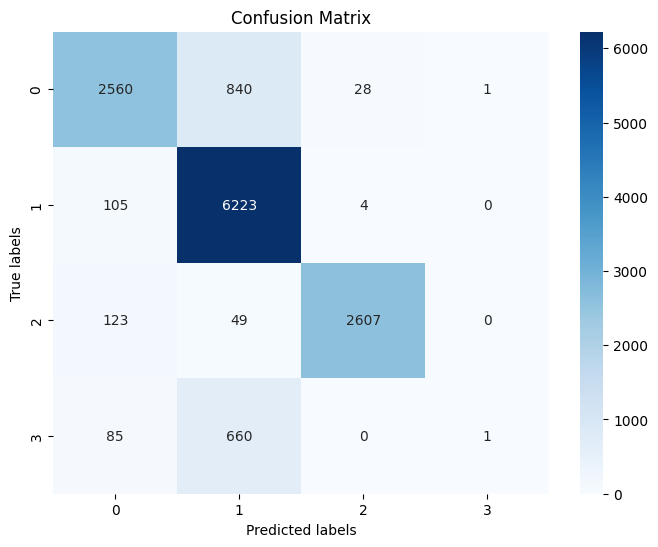

In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

accuracy_history = []
loss_history = []

def test_model(model, test_loader, criterion, device):
    model.eval()

    test_loss = 0.0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            accuracy = correct / total
            loss_history.append(loss.item())
            accuracy_history.append(accuracy)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = (correct / total)*100
    test_loss = test_loss / total
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    cm = confusion_matrix(all_labels, all_predictions)

    return test_accuracy, test_loss, f1, cm

test_accuracy, test_loss, f1, confusion_matrix = test_model(resnet18, test_loader, criterion, device)

print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')
print(f'F1 Score: {f1}')

# conf matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

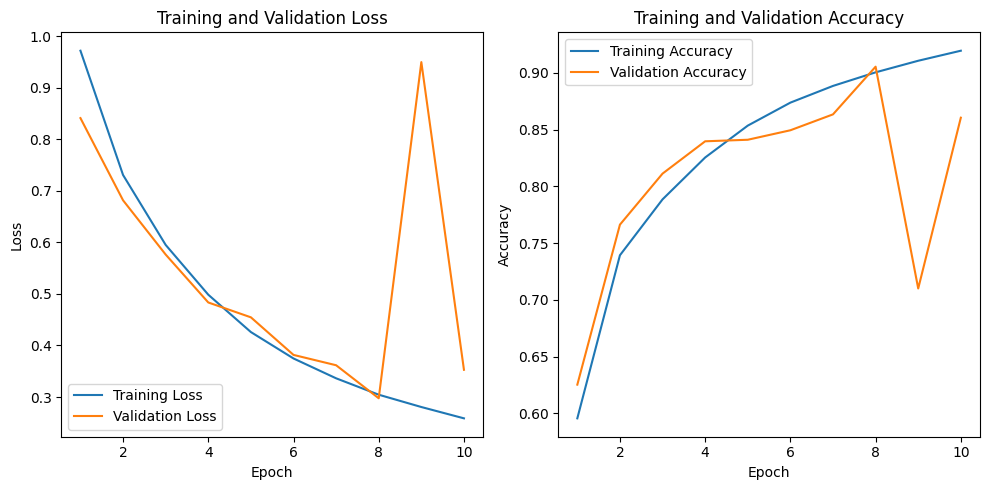

In [37]:
import matplotlib.pyplot as plt

# training and validation loss

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_losses, label='Training Loss')
plt.plot(range(1, 11), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#VGG-16

In [40]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

vgg16 = models.vgg16(pretrained=False)
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
)
for param in vgg16.classifier[6].parameters():
    param.requires_grad = True
    # Define optimizer and criterion
optimizer = optim.SGD(vgg16.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)
path='/content/Images_'
train_loader, test_loader, val_loader = load_data(path, 0.3, 0.1, 100)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [48]:
import torch
import numpy as np

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):

    vgg16.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):

        inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Train Loss: {loss.item():.4f}')

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation

    vgg16.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):

            inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

            outputs = vgg16(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(val_loader)}], Val Loss: {loss.item():.4f}')

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

print('Training complete')

Epoch [1/10], Batch [1/266], Train Loss: 5.5509
Epoch [1/10], Batch [2/266], Train Loss: 5.5489
Epoch [1/10], Batch [3/266], Train Loss: 5.5451
Epoch [1/10], Batch [4/266], Train Loss: 5.5396
Epoch [1/10], Batch [5/266], Train Loss: 5.5444
Epoch [1/10], Batch [6/266], Train Loss: 5.5296
Epoch [1/10], Batch [7/266], Train Loss: 5.5157
Epoch [1/10], Batch [8/266], Train Loss: 5.5152
Epoch [1/10], Batch [9/266], Train Loss: 5.5090
Epoch [1/10], Batch [10/266], Train Loss: 5.4995
Epoch [1/10], Batch [11/266], Train Loss: 5.4921
Epoch [1/10], Batch [12/266], Train Loss: 5.4812
Epoch [1/10], Batch [13/266], Train Loss: 5.4754
Epoch [1/10], Batch [14/266], Train Loss: 5.4534
Epoch [1/10], Batch [15/266], Train Loss: 5.4421
Epoch [1/10], Batch [16/266], Train Loss: 5.4536
Epoch [1/10], Batch [17/266], Train Loss: 5.4440
Epoch [1/10], Batch [18/266], Train Loss: 5.4123
Epoch [1/10], Batch [19/266], Train Loss: 5.3932
Epoch [1/10], Batch [20/266], Train Loss: 5.3657
Epoch [1/10], Batch [21/266],

Testing Accuracy: 95.30332681017613
Testing Loss: 0.14989903114425407
F1 Score: 0.9529073144429819


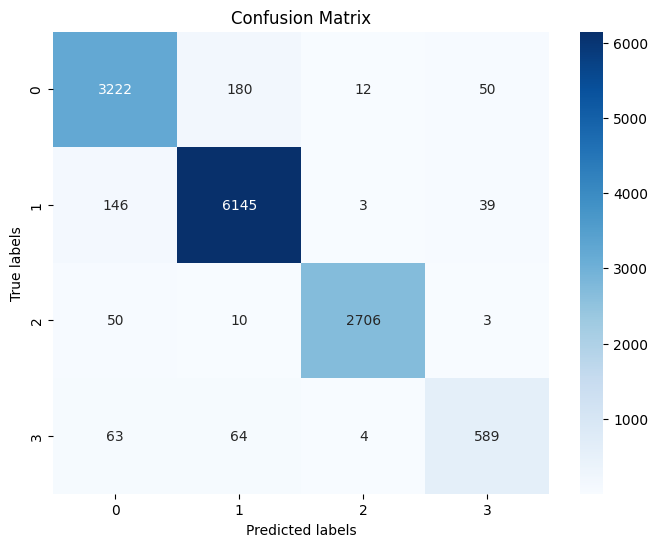

In [49]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

accuracy_history = []
loss_history = []

def test_model(model, test_loader, criterion, device):
    model.eval()

    test_loss = 0.0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            accuracy = correct / total
            loss_history.append(loss.item())
            accuracy_history.append(accuracy)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = (correct / total)*100
    test_loss = test_loss / total
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    cm = confusion_matrix(all_labels, all_predictions)

    return test_accuracy, test_loss, f1, cm

test_accuracy, test_loss, f1, confusion_matrix = test_model(vgg16, test_loader, criterion, device)

print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')
print(f'F1 Score: {f1}')

# conf matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

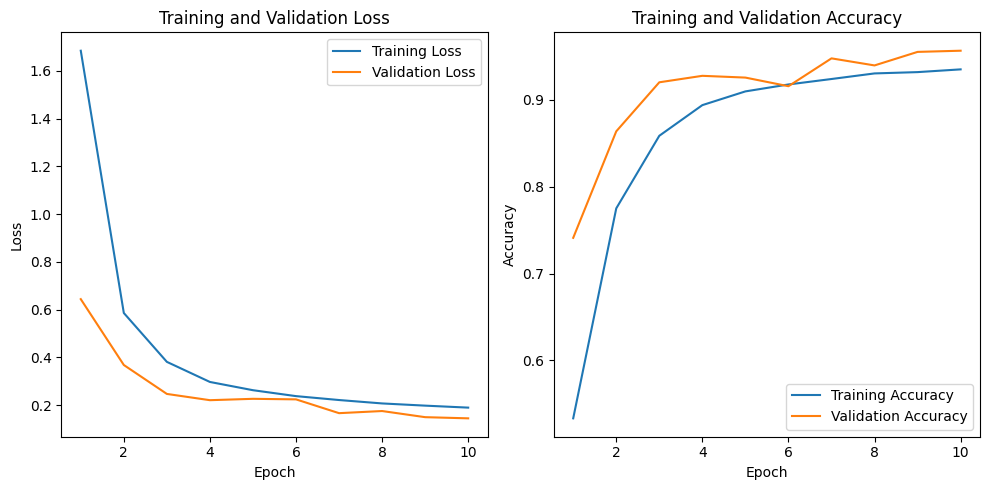

In [50]:
import matplotlib.pyplot as plt

# training and validation loss

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1,  num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#MobileNetV2

In [51]:
import torch
from torchvision import models
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using "+str(device))

mobilenet = models.mobilenet_v2(weights=None)
mobilenet.classifier[-1] = nn.Linear(1280, 4)
mobilenet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mobilenet.parameters(), lr=0.001, momentum=0.9)

path='/content/Images_'
train_loader, test_loader, val_loader = load_data(path, 0.3, 0.1, 100)

Using cuda


In [ ]:
import torch
import numpy as np

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):

    mobilenet.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):

        inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

        optimizer.zero_grad()
        outputs = mobilenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Train Loss: {loss.item():.4f}')

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation

    mobilenet.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):

            inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

            outputs = mobilenet(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(val_loader)}], Val Loss: {loss.item():.4f}')

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

print('Training complete')

Epoch [1/10], Batch [1/266], Train Loss: 1.0995
Epoch [1/10], Batch [2/266], Train Loss: 1.0679
Epoch [1/10], Batch [3/266], Train Loss: 1.0609
Epoch [1/10], Batch [4/266], Train Loss: 1.1786
Epoch [1/10], Batch [5/266], Train Loss: 1.0841
Epoch [1/10], Batch [6/266], Train Loss: 1.0556
Epoch [1/10], Batch [7/266], Train Loss: 1.1166
Epoch [1/10], Batch [8/266], Train Loss: 0.9531
Epoch [1/10], Batch [9/266], Train Loss: 0.9723
Epoch [1/10], Batch [10/266], Train Loss: 1.0214
Epoch [1/10], Batch [11/266], Train Loss: 0.9882
Epoch [1/10], Batch [12/266], Train Loss: 1.0753
Epoch [1/10], Batch [13/266], Train Loss: 0.9814
Epoch [1/10], Batch [14/266], Train Loss: 1.1095
Epoch [1/10], Batch [15/266], Train Loss: 0.9937
Epoch [1/10], Batch [16/266], Train Loss: 1.0255
Epoch [1/10], Batch [17/266], Train Loss: 0.9615
Epoch [1/10], Batch [18/266], Train Loss: 0.8919
Epoch [1/10], Batch [19/266], Train Loss: 0.9434
Epoch [1/10], Batch [20/266], Train Loss: 0.9001
Epoch [1/10], Batch [21/266],

In [ ]:
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

accuracy_history = []
loss_history = []

def test_model(model, test_loader, criterion, device):
    model.eval()

    test_loss = 0.0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

            accuracy = correct / total
            loss_history.append(loss.item())
            accuracy_history.append(accuracy)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_accuracy = (correct / total)*100
    test_loss = test_loss / total
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    cm = confusion_matrix(all_labels, all_predictions)

    return test_accuracy, test_loss, f1, cm

test_accuracy, test_loss, f1, confusion_matrix = test_model(mobilenet, test_loader, criterion, device)

print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')
print(f'F1 Score: {f1}')

# conf matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Test Accuracy of the model on the 13286 test images: 98.18606051482763 %


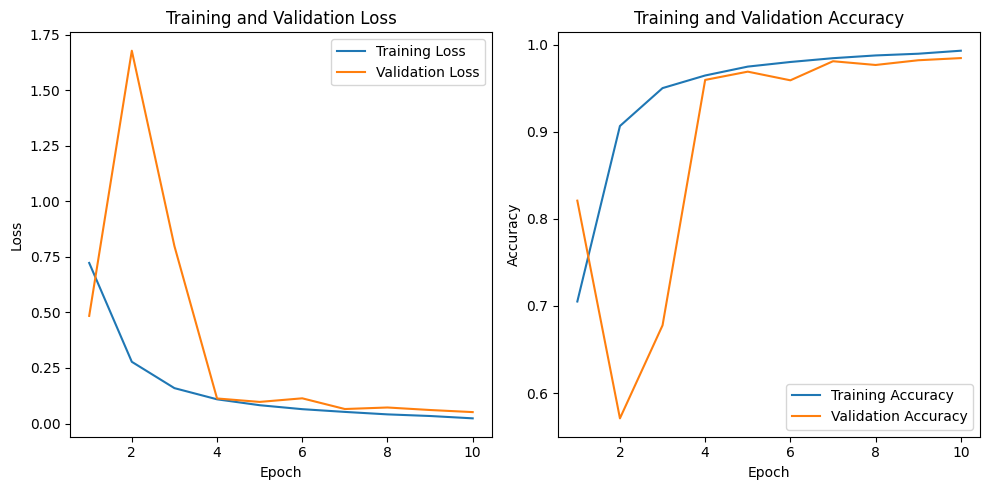

In [ ]:
import matplotlib.pyplot as plt

# training and validation loss

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1,  num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#ResNet-18 Transfer Learning

In [ ]:
import torch
import torchvision.models as models
import torch.optim as optim

# Loading the ResNet-18 model
model = models.resnet18(weights='IMAGENET1K_V1')

# Modify the last layer for 4 classes
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 4)

# Define optimizer and criterion
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Moving the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Device: {}".format(device))


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 89.0MB/s]

Device: cuda:0


In [ ]:
import torch
import numpy as np

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

num_epochs = 10

for epoch in range(num_epochs):

    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):

        inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Train Loss: {loss.item():.4f}')

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):

            inputs, labels = inputs.cuda().to(device), labels.cuda().to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(val_loader)}], Val Loss: {loss.item():.4f}')

    val_loss /= len(val_loader.dataset)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}')

print('Training complete')

Epoch [1/10], Batch [1/266], Train Loss: 0.5645
Epoch [1/10], Batch [2/266], Train Loss: 0.5430
Epoch [1/10], Batch [3/266], Train Loss: 0.5526
Epoch [1/10], Batch [4/266], Train Loss: 0.4768
Epoch [1/10], Batch [5/266], Train Loss: 0.4372
Epoch [1/10], Batch [6/266], Train Loss: 0.4445
Epoch [1/10], Batch [7/266], Train Loss: 0.4829
Epoch [1/10], Batch [8/266], Train Loss: 0.4289
Epoch [1/10], Batch [9/266], Train Loss: 0.4050
Epoch [1/10], Batch [10/266], Train Loss: 0.4507
Epoch [1/10], Batch [11/266], Train Loss: 0.4664
Epoch [1/10], Batch [12/266], Train Loss: 0.4350
Epoch [1/10], Batch [13/266], Train Loss: 0.5951
Epoch [1/10], Batch [14/266], Train Loss: 0.5382
Epoch [1/10], Batch [15/266], Train Loss: 0.5272
Epoch [1/10], Batch [16/266], Train Loss: 0.4663
Epoch [1/10], Batch [17/266], Train Loss: 0.4757
Epoch [1/10], Batch [18/266], Train Loss: 0.5036
Epoch [1/10], Batch [19/266], Train Loss: 0.4751
Epoch [1/10], Batch [20/266], Train Loss: 0.4532
Epoch [1/10], Batch [21/266],

In [ ]:
#Evaluation to check the test accuracy.
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(total, (correct / total) * 100))

Test Accuracy of the model on the 13286 test images: 98.43444227005871 %


In [ ]:
vgg_accuracies, vgg_losses = test_model(vgg16, test_loader, criterion, device)
rn18_accuracies, rn18_losses = test_model(resnet18, test_loader, criterion, device)
mbnet_accuracies, mbnet_losses = test_model(mobilenet, test_loader, criterion, device)

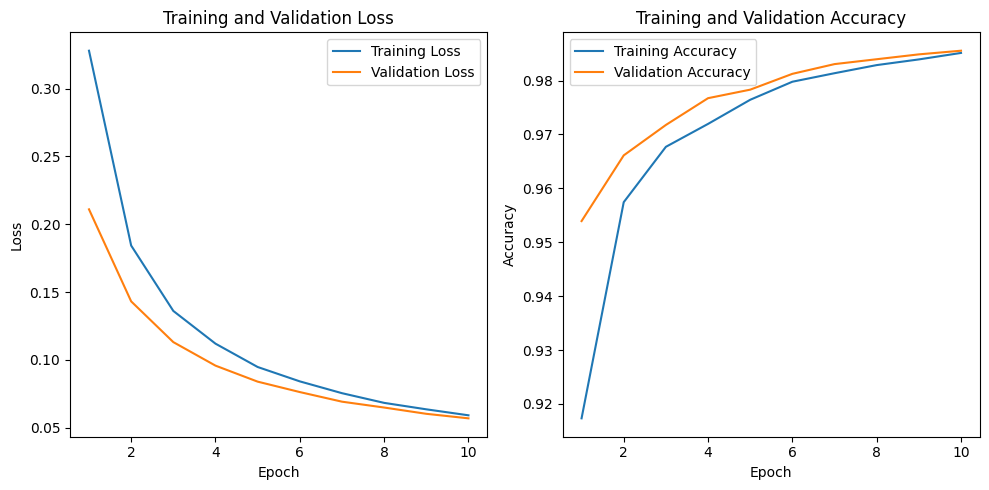

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(vgg_accuracies)), vgg_accuracies, label='VGG-16')
plt.plot(range(len(rn18_accuracies)), rn18_accuracies, label='ResNET-18')
plt.plot(range(len(mbnet_accuracies)), mbnet_accuracies, label='MobileNetV2')
plt.xlabel('Batches')
plt.ylabel('Testing Accuracy')
plt.title('Comparison of Models')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
torch.save(model, '/content/resnet18tl-small.pt')